In [43]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

In [44]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [48]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [49]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [50]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [51]:
from datetime import datetime

In [52]:
import gzip
import pickle

X, y = pickle.load(gzip.open('/content/flatland_train.data', 'rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [53]:
#PVZ modelio, nukopinu nuo destytojo
NAME = "model".format(int(time.time()))
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [62]:
loss = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0184 - val_accuracy: 0.9940
Epoch 2/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0248 - val_accuracy: 0.9910
Epoch 3/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0207 - val_accuracy: 0.9940
Epoch 4/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch 5/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0175 - val_accuracy: 0.9935
Epoch 6/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0274 - val_accuracy: 0.9920
Epoch 7/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0141 - val_accuracy: 0.9970
Epoch 

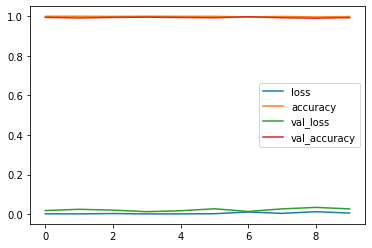

In [63]:
pd.DataFrame(loss.history).plot()

In [64]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 99.83%


In [65]:
model.save('model.h5')

In [66]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

ResourceExhaustedError: ignored